# Scraping the Data from Amazon.in

In [2]:
pip install bs4

  Using cached https://files.pythonhosted.org/packages/10/ed/7e8b97591f6f456174139ec089c769f89a94a1a4025fe967691de971f314/bs4-0.0.1.tar.gz
  Created wheel for bs4: filename=bs4-0.0.1-cp37-none-any.whl size=1278 sha256=91cab5e7e6cabbdd93075b19ca51e547388aa3e93e3a7a9334d7a624e3341025
  Stored in directory: C:\Users\tulas\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [88]:
import requests
from bs4 import BeautifulSoup


In [89]:
header={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36'}

In [90]:
cookie={} # insert request cookies within{}
def getAmazonSearch(search_query,page_number):
    url="https://www.amazon.in/s?k={search_query}&page={page_number}".format(search_query = search_query, page_number=page_number)
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [91]:
def Searchasin(asin):
    url="https://www.amazon.in/dp/"+asin
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [92]:
def Searchreviews(review_link):
    url="https://www.amazon.in"+review_link
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [93]:
number_of_pages = 0
response=getAmazonSearch('smart+phones',1)
soup=BeautifulSoup(response.content)
pages = soup.findAll('li',{'class':'a-disabled'})
for i in pages[1:]:
    number_of_pages=int(i.text)

https://www.amazon.in/s?k=smart+phones&page=1


In [94]:
data_asin=[]
for i in range(1,number_of_pages+1):
    response = getAmazonSearch('smart+phones',i)
    soup = BeautifulSoup(response.content)
    for i in soup.findAll("div",{'class':"sg-col-20-of-24 s-result-item s-asin sg-col-0-of-12 sg-col-28-of-32 sg-col-16-of-20 sg-col sg-col-32-of-36 sg-col-12-of-16 sg-col-24-of-28"}):
        data_asin.append(i['data-asin'])

https://www.amazon.in/s?k=smart+phones&page=1
https://www.amazon.in/s?k=smart+phones&page=2
https://www.amazon.in/s?k=smart+phones&page=3
https://www.amazon.in/s?k=smart+phones&page=4
https://www.amazon.in/s?k=smart+phones&page=5
https://www.amazon.in/s?k=smart+phones&page=6
https://www.amazon.in/s?k=smart+phones&page=7
https://www.amazon.in/s?k=smart+phones&page=8
https://www.amazon.in/s?k=smart+phones&page=9
https://www.amazon.in/s?k=smart+phones&page=10
https://www.amazon.in/s?k=smart+phones&page=11
https://www.amazon.in/s?k=smart+phones&page=12
https://www.amazon.in/s?k=smart+phones&page=13
https://www.amazon.in/s?k=smart+phones&page=14
https://www.amazon.in/s?k=smart+phones&page=15
https://www.amazon.in/s?k=smart+phones&page=16
https://www.amazon.in/s?k=smart+phones&page=17
https://www.amazon.in/s?k=smart+phones&page=18
https://www.amazon.in/s?k=smart+phones&page=19
https://www.amazon.in/s?k=smart+phones&page=20


In [95]:
data_asin = set(data_asin)

In [96]:
data_asin = list(data_asin)

In [97]:
link=[]
for i in data_asin[:120]:
    response=Searchasin(i)
    soup=BeautifulSoup(response.content)
    for i in soup.findAll("a",{'data-hook':"see-all-reviews-link-foot"}):
        link.append(i['href'])

https://www.amazon.in/dp/B07HGLM366
https://www.amazon.in/dp/B086984LJ4
https://www.amazon.in/dp/B082FP7T27
https://www.amazon.in/dp/B08444Z7R9
https://www.amazon.in/dp/B07HGJJ559
https://www.amazon.in/dp/B078BNQ318
https://www.amazon.in/dp/B0859RGNB4
https://www.amazon.in/dp/B086982ZKF
https://www.amazon.in/dp/B08CGHK8QM
https://www.amazon.in/dp/B077PW9ZQL
https://www.amazon.in/dp/B086KCCSDH
https://www.amazon.in/dp/B089N3877P
https://www.amazon.in/dp/B07X4PXKZ7
https://www.amazon.in/dp/B086KCC67C
https://www.amazon.in/dp/B07X4PW616
https://www.amazon.in/dp/B07DJCJBB3
https://www.amazon.in/dp/B07N8SDZ4M
https://www.amazon.in/dp/B07XVM1KVY
https://www.amazon.in/dp/B07HGLC2CG
https://www.amazon.in/dp/B07DJCYBVK
https://www.amazon.in/dp/B08185WJL7
https://www.amazon.in/dp/B08334RTFV
https://www.amazon.in/dp/B07X1KSLCB
https://www.amazon.in/dp/B07X8QTSL4
https://www.amazon.in/dp/B08FG7WMV6
https://www.amazon.in/dp/B07HGGYWL6
https://www.amazon.in/dp/B089MTL51J
https://www.amazon.in/dp/B07

In [98]:
len(link)

107

In [99]:
reviews=[]
product_name = []
for j in range(len(link)):
    for k in range(1,11):
        response=Searchreviews(link[j]+'&pageNumber='+str(k))
        soup = BeautifulSoup(response.content)
        for i in soup.findAll('a',{'data-hook':'review-title'}):
            reviews.append(i.text)
            for i in soup.findAll('a',{'data-hook':'product-link'}):
                product_name.append(i.text)
                
            

https://www.amazon.in/Samsung-Galaxy-Space-Black-Storage/product-reviews/B07HGLM366/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Samsung-Galaxy-Space-Black-Storage/product-reviews/B07HGLM366/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Samsung-Galaxy-Space-Black-Storage/product-reviews/B07HGLM366/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Samsung-Galaxy-Space-Black-Storage/product-reviews/B07HGLM366/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Samsung-Galaxy-Space-Black-Storage/product-reviews/B07HGLM366/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.in/Samsung-Galaxy-Space-Black-Storage/product-reviews/B07HGLM366/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.in/Samsung-Galaxy-Space-Black-Sto

https://www.amazon.in/itel-itL6005-Vision1-Gradation-Storage/product-reviews/B0859RGNB4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.in/itel-itL6005-Vision1-Gradation-Storage/product-reviews/B0859RGNB4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.in/itel-itL6005-Vision1-Gradation-Storage/product-reviews/B0859RGNB4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.in/itel-itL6005-Vision1-Gradation-Storage/product-reviews/B0859RGNB4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.in/itel-itL6005-Vision1-Gradation-Storage/product-reviews/B0859RGNB4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.in/itel-itL6005-Vision1-Gradation-Storage/product-reviews/B0859RGNB4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.in/Redmi

https://www.amazon.in/Redmi-Note-Space-Black-Storage/product-reviews/B07X4PXKZ7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.in/Redmi-Note-Space-Black-Storage/product-reviews/B07X4PXKZ7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.in/Redmi-Note-Space-Black-Storage/product-reviews/B07X4PXKZ7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.in/Redmi-Note-Space-Black-Storage/product-reviews/B07X4PXKZ7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Redmi-Note-Space-Black-Storage/product-reviews/B07X4PXKZ7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Redmi-Note-Space-Black-Storage/product-reviews/B07X4PXKZ7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Redmi-Note-Space-Black-Storage/product-reviews/B07X4P

https://www.amazon.in/Test-Exclusive-750/product-reviews/B07DJCYBVK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Test-Exclusive-750/product-reviews/B07DJCYBVK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Test-Exclusive-750/product-reviews/B07DJCYBVK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Test-Exclusive-750/product-reviews/B07DJCYBVK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.in/Test-Exclusive-750/product-reviews/B07DJCYBVK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.in/Test-Exclusive-750/product-reviews/B07DJCYBVK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.in/Test-Exclusive-750/product-reviews/B07DJCYBVK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https:

https://www.amazon.in/Samsung-Galaxy-Storage-Additional-Exchange/product-reviews/B089MTL51J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.in/Samsung-Galaxy-Storage-Additional-Exchange/product-reviews/B089MTL51J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.in/Samsung-Galaxy-Storage-Additional-Exchange/product-reviews/B089MTL51J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.in/Samsung-Galaxy-Storage-Additional-Exchange/product-reviews/B089MTL51J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.in/Samsung-Galaxy-Storage-Additional-Exchange/product-reviews/B089MTL51J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.in/Vivo-Midnight-Storage-Additional-Exchange/product-reviews/B07XD2HY9L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
http

https://www.amazon.in/Mi-Redmi-Smartphone-Black-Storage/product-reviews/B07Z6GKRS7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.in/Mi-Redmi-Smartphone-Black-Storage/product-reviews/B07Z6GKRS7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.in/Mi-Redmi-Smartphone-Black-Storage/product-reviews/B07Z6GKRS7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.in/Mi-Redmi-Smartphone-Black-Storage/product-reviews/B07Z6GKRS7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.in/Flowing-Silver-Storage-Additional-Exchange/product-reviews/B086K9CW1W/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Flowing-Silver-Storage-Additional-Exchange/product-reviews/B086K9CW1W/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Flowing-Silver-St

https://www.amazon.in/Redmi-Note-Pro-Storage-Processor/product-reviews/B07X3NZZJ1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.in/OnePlus-Nord-Gray-128GB-Storage/product-reviews/B08695ZSP6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/OnePlus-Nord-Gray-128GB-Storage/product-reviews/B08695ZSP6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/OnePlus-Nord-Gray-128GB-Storage/product-reviews/B08695ZSP6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/OnePlus-Nord-Gray-128GB-Storage/product-reviews/B08695ZSP6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/OnePlus-Nord-Gray-128GB-Storage/product-reviews/B08695ZSP6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.in/OnePlus-Nord-Gray-128GB-Storage/product-review

https://www.amazon.in/Lowfe-Bluetooth-Hands-Free-Earphones-Smartphones/product-reviews/B08CZPWWCN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Lowfe-Bluetooth-Hands-Free-Earphones-Smartphones/product-reviews/B08CZPWWCN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Lowfe-Bluetooth-Hands-Free-Earphones-Smartphones/product-reviews/B08CZPWWCN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.in/Lowfe-Bluetooth-Hands-Free-Earphones-Smartphones/product-reviews/B08CZPWWCN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.in/Lowfe-Bluetooth-Hands-Free-Earphones-Smartphones/product-reviews/B08CZPWWCN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.in/Lowfe-Bluetooth-Hands-Free-Earphones-Smartphones/product-reviews/B08CZPWWCN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&review

https://www.amazon.in/Test-Exclusive-672/product-reviews/B07HGJK56Y/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Test-Exclusive-672/product-reviews/B07HGJK56Y/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.in/Test-Exclusive-672/product-reviews/B07HGJK56Y/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.in/Test-Exclusive-672/product-reviews/B07HGJK56Y/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.in/Test-Exclusive-672/product-reviews/B07HGJK56Y/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.in/Test-Exclusive-672/product-reviews/B07HGJK56Y/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.in/Test-Exclusive-672/product-reviews/B07HGJK56Y/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https

https://www.amazon.in/IKall-K4-Plus-Display-Storage/product-reviews/B08B3WKTWR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.in/IKall-K4-Plus-Display-Storage/product-reviews/B08B3WKTWR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.in/IKall-K4-Plus-Display-Storage/product-reviews/B08B3WKTWR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.in/Black-Storage-Additional-Exchange-Offers/product-reviews/B07PQ7CXKG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Black-Storage-Additional-Exchange-Offers/product-reviews/B07PQ7CXKG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Black-Storage-Additional-Exchange-Offers/product-reviews/B07PQ7CXKG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Black-Storage-Additional-E

https://www.amazon.in/Apple-iPhone-11-128GB-White/product-reviews/B07XVLMXYH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Apple-iPhone-11-128GB-White/product-reviews/B07XVLMXYH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Apple-iPhone-11-128GB-White/product-reviews/B07XVLMXYH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Apple-iPhone-11-128GB-White/product-reviews/B07XVLMXYH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Apple-iPhone-11-128GB-White/product-reviews/B07XVLMXYH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.in/Apple-iPhone-11-128GB-White/product-reviews/B07XVLMXYH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.in/Apple-iPhone-11-128GB-White/product-reviews/B07XVLMXYH/ref=cm_cr_dp_d_sh

https://www.amazon.in/Xifo-Gome-Black-128-RAM/product-reviews/B08DK9QSXX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Xifo-Gome-Black-128-RAM/product-reviews/B08DK9QSXX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.in/Xifo-Gome-Black-128-RAM/product-reviews/B08DK9QSXX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.in/Xifo-Gome-Black-128-RAM/product-reviews/B08DK9QSXX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.in/Xifo-Gome-Black-128-RAM/product-reviews/B08DK9QSXX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.in/Xifo-Gome-Black-128-RAM/product-reviews/B08DK9QSXX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.in/Xifo-Gome-Black-128-RAM/product-reviews/B08DK9QSXX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerT

https://www.amazon.in/OnePlus-Nord-Marble-128GB-Storage/product-reviews/B086977J3K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.in/OnePlus-Nord-Marble-128GB-Storage/product-reviews/B086977J3K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.in/OnePlus-Nord-Marble-128GB-Storage/product-reviews/B086977J3K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.in/Realme-Comet-White-64-RAM/product-reviews/B08DNNQ235/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Realme-Comet-White-64-RAM/product-reviews/B08DNNQ235/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Realme-Comet-White-64-RAM/product-reviews/B08DNNQ235/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Realme-Comet-White-64-RAM/product-reviews/B08DNNQ235/ref=cm

https://www.amazon.in/POCO-Xiome-Smartphone-Armored-Snapdragon/product-reviews/B07H6NJX5F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.in/POCO-Xiome-Smartphone-Armored-Snapdragon/product-reviews/B07H6NJX5F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/POCO-Xiome-Smartphone-Armored-Snapdragon/product-reviews/B07H6NJX5F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/POCO-Xiome-Smartphone-Armored-Snapdragon/product-reviews/B07H6NJX5F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/POCO-Xiome-Smartphone-Armored-Snapdragon/product-reviews/B07H6NJX5F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/POCO-Xiome-Smartphone-Armored-Snapdragon/product-reviews/B07H6NJX5F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.ama

https://www.amazon.in/Meya-Happy-C01Plus-Resistant-Functions/product-reviews/B08CDY93KR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Meya-Happy-C01Plus-Resistant-Functions/product-reviews/B08CDY93KR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Meya-Happy-C01Plus-Resistant-Functions/product-reviews/B08CDY93KR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.in/Meya-Happy-C01Plus-Resistant-Functions/product-reviews/B08CDY93KR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.in/Meya-Happy-C01Plus-Resistant-Functions/product-reviews/B08CDY93KR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.in/Meya-Happy-C01Plus-Resistant-Functions/product-reviews/B08CDY93KR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.in/Meya-H

https://www.amazon.in/Vivo-Storage-Additional-Exchange-Offers/product-reviews/B086KDZGTZ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.in/Vivo-Storage-Additional-Exchange-Offers/product-reviews/B086KDZGTZ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.in/Vivo-Storage-Additional-Exchange-Offers/product-reviews/B086KDZGTZ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.in/Vivo-Storage-Additional-Exchange-Offers/product-reviews/B086KDZGTZ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.in/Redmi-Note-Neptune-128GB-Storage/product-reviews/B07X1KT6LF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Redmi-Note-Neptune-128GB-Storage/product-reviews/B07X1KT6LF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Redmi-Note-Ne

https://www.amazon.in/%E0%A4%8F%E0%A4%95%E0%A5%8D%E0%A4%B5%E0%A4%BE-%E0%A4%B9%E0%A4%B2%E0%A5%8D%E0%A4%95%E0%A4%BE-%E0%A4%B8%E0%A5%8D%E0%A4%9F%E0%A5%8B%E0%A4%B0%E0%A5%87%E0%A4%9C-%E0%A4%85%E0%A4%A4%E0%A4%BF%E0%A4%B0%E0%A4%BF%E0%A4%95%E0%A5%8D%E0%A4%A4-%E0%A4%8F%E0%A4%95%E0%A5%8D%E0%A4%B8%E0%A4%9A%E0%A5%87%E0%A4%82%E0%A4%9C/product-reviews/B07PSHDTHB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.in/%E0%A4%8F%E0%A4%95%E0%A5%8D%E0%A4%B5%E0%A4%BE-%E0%A4%B9%E0%A4%B2%E0%A5%8D%E0%A4%95%E0%A4%BE-%E0%A4%B8%E0%A5%8D%E0%A4%9F%E0%A5%8B%E0%A4%B0%E0%A5%87%E0%A4%9C-%E0%A4%85%E0%A4%A4%E0%A4%BF%E0%A4%B0%E0%A4%BF%E0%A4%95%E0%A5%8D%E0%A4%A4-%E0%A4%8F%E0%A4%95%E0%A5%8D%E0%A4%B8%E0%A4%9A%E0%A5%87%E0%A4%82%E0%A4%9C/product-reviews/B07PSHDTHB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.in/%E0%A4%8F%E0%A4%95%E0%A5%8D%E0%A4%B5%E0%A4%BE-%E0%A4%B9%E0%A4%B2%E0%A5%8D%E0%A4%95%E0%A4%BE-%E0%A4%B8%E0%A5%8D%E0%A4%9F%E0%A5%8B

https://www.amazon.in/Oppo-Unicorn-Storage-Additional-Exchange/product-reviews/B07XBYMDTH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.in/Oppo-Unicorn-Storage-Additional-Exchange/product-reviews/B07XBYMDTH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.in/Oppo-Unicorn-Storage-Additional-Exchange/product-reviews/B07XBYMDTH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.in/Oppo-Unicorn-Storage-Additional-Exchange/product-reviews/B07XBYMDTH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.in/Oppo-Unicorn-Storage-Additional-Exchange/product-reviews/B07XBYMDTH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.in/Oppo-Unicorn-Storage-Additional-Exchange/product-reviews/B07XBYMDTH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.ama

https://www.amazon.in/Renewed-Google-Pixel-Just-Black/product-reviews/B0824BR684/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.in/Panasonic-Eluga-I8-32GB-%E0%A4%B8%E0%A5%8D%E0%A4%9F%E0%A5%8B%E0%A4%B0%E0%A5%87%E0%A4%9C/product-reviews/B085W2P4WV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Panasonic-Eluga-I8-32GB-%E0%A4%B8%E0%A5%8D%E0%A4%9F%E0%A5%8B%E0%A4%B0%E0%A5%87%E0%A4%9C/product-reviews/B085W2P4WV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Panasonic-Eluga-I8-32GB-%E0%A4%B8%E0%A5%8D%E0%A4%9F%E0%A5%8B%E0%A4%B0%E0%A5%87%E0%A4%9C/product-reviews/B085W2P4WV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Panasonic-Eluga-I8-32GB-%E0%A4%B8%E0%A5%8D%E0%A4%9F%E0%A5%8B%E0%A4%B0%E0%A5%87%E0%A4%9C/product-reviews/B085W2P4WV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4


https://www.amazon.in/A7-Storage-Additional-Exchange-Offers/product-reviews/B07MBP65HK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.in/A7-Storage-Additional-Exchange-Offers/product-reviews/B07MBP65HK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.in/Realme-2GB-32GB-Diamond-Black/product-reviews/B07TWXNL3F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Realme-2GB-32GB-Diamond-Black/product-reviews/B07TWXNL3F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Realme-2GB-32GB-Diamond-Black/product-reviews/B07TWXNL3F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Realme-2GB-32GB-Diamond-Black/product-reviews/B07TWXNL3F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Realme-2GB-32GB-Diamond-Black/product-revie

https://www.amazon.in/Realme-C11-Rich-Green-RAM/product-reviews/B08DG4XPBC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Realme-C11-Rich-Green-RAM/product-reviews/B08DG4XPBC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Realme-C11-Rich-Green-RAM/product-reviews/B08DG4XPBC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.in/Realme-C11-Rich-Green-RAM/product-reviews/B08DG4XPBC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.in/Realme-C11-Rich-Green-RAM/product-reviews/B08DG4XPBC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.in/Realme-C11-Rich-Green-RAM/product-reviews/B08DG4XPBC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.in/Realme-C11-Rich-Green-RAM/product-reviews/B08DG4XPBC/ref=cm_cr_dp_d_show_all_btm?ie=

In [100]:
len(product_name)


7911

In [101]:
rev_dic = {'product_name':product_name, 'reviews':reviews}

In [1]:
import pandas as pd

In [103]:
review_data=pd.DataFrame.from_dict(rev_dic)

In [185]:
review_data.to_csv(r'E:\73 strings\custom\Scraped_reviews.csv',index=False) 

In [2]:
review_data = pd.read_csv(r'E:\73 strings\custom\Scraped_reviews.csv')

In [3]:
review_data

,product_name,reviews
0,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",\nSamsung m31 all rounder best mobile.\n
1,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",\nBest Value for Money in this Range. Go for i...
2,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",\nPoor camera\n
3,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",\nFaulty product\n
4,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...","\nFalse ads, poor camera quality, inefficient ..."
...,...,...
7906,"OPPO A31 (Lake Green, 6GB RAM, 128GB Storage) ...",\nNice product\n
7907,"OPPO A31 (Lake Green, 6GB RAM, 128GB Storage) ...",\nMind blowing\n
7908,"OPPO A31 (Lake Green, 6GB RAM, 128GB Storage) ...",\nOppo A31\n
7909,"OPPO A31 (Lake Green, 6GB RAM, 128GB Storage) ...",\nWaste\n


# REVIEWS PREPROCESSING PART

In [4]:


df=review_data.copy()

In [5]:
df['reviews']=df['reviews'].apply(lambda x:x.strip('\n'))

In [6]:
df

,product_name,reviews
0,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",Samsung m31 all rounder best mobile.
1,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",Best Value for Money in this Range. Go for it ...
2,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",Poor camera
3,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",Faulty product
4,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...","False ads, poor camera quality, inefficient ba..."
...,...,...
7906,"OPPO A31 (Lake Green, 6GB RAM, 128GB Storage) ...",Nice product
7907,"OPPO A31 (Lake Green, 6GB RAM, 128GB Storage) ...",Mind blowing
7908,"OPPO A31 (Lake Green, 6GB RAM, 128GB Storage) ...",Oppo A31
7909,"OPPO A31 (Lake Green, 6GB RAM, 128GB Storage) ...",Waste


In [7]:


import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer



In [8]:


STOPWORDS=stopwords.words("english")

In [9]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [10]:
import string   
import re

def clean_text(text):
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    
    return text_cleaned

In [11]:
df['cleaned_reviews']=df['reviews'].apply(lambda x:clean_text(x))

In [12]:


df.head()



,product_name,reviews,cleaned_reviews
0,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",Samsung m31 all rounder best mobile.,samsung m31 rounder best mobil
1,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",Best Value for Money in this Range. Go for it ...,best valu money rang go without doubt
2,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",Poor camera,poor camera
3,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",Faulty product,faulti product
4,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...","False ads, poor camera quality, inefficient ba...",fals ad poor camera qualiti ineffici batteri m...


In [13]:
df_1 = df['cleaned_reviews']

In [14]:
df_1.to_csv('E:/73 strings/custom/test_reviews.txt', header=None, index=None, mode='a')

C:\Users\tulas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# TRAINING THE MODEL

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

In [16]:
pipeline = Pipeline(
            [
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(
                    loss='hinge',
                    penalty='l2',
                    alpha=1e-3,
                    random_state=42,
                    max_iter=100,
                    learning_rate='optimal',
                    tol=None,
                )),
            ]
        )

In [17]:
# pip install pytreebank

In [18]:
# Load data
import pytreebank
import sys
import os

dataset = pytreebank.load_sst()

In [19]:
out_path = ("E:/73 strings/custom/sst_{}.txt")

In [20]:
for category in ['train', 'test', 'dev']:
    with open(out_path.format(category), 'w') as outfile:
        for item in dataset[category]:
            outfile.write("__label__{}\t{}\n".format(
                item.to_labeled_lines()[0][0] + 1,
                item.to_labeled_lines()[0][1]
            ))

In [21]:
import pandas as pd# Read train data
train_df = pd.read_table('E:/73 strings/custom/sst_train.txt', sep='\t',encoding='ISO-8859-1', header=None, names=['truth', 'text'])
train_df['truth'] = train_df['truth'].str.replace('__label__', '')
train_df['truth'] = train_df['truth'].astype(int).astype('category')
train_df.head()

,truth,text
0,4,The Rock is destined to be the 21st Century 's...
1,5,The gorgeously elaborate continuation of `` Th...
2,4,Singer/composer Bryan Adams contributes a slew...
3,3,You 'd think by now America would have had eno...
4,4,Yet the act is still charming here .


In [22]:
learner = pipeline.fit(train_df['text'], train_df['truth'])

In [23]:
predictions = learner.predict(df['cleaned_reviews'])

In [24]:
df['pred']= list(predictions)

# EDA

In [25]:
df

,product_name,reviews,cleaned_reviews,pred
0,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",Samsung m31 all rounder best mobile.,samsung m31 rounder best mobil,5
1,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",Best Value for Money in this Range. Go for it ...,best valu money rang go without doubt,5
2,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",Poor camera,poor camera,1
3,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",Faulty product,faulti product,2
4,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...","False ads, poor camera quality, inefficient ba...",fals ad poor camera qualiti ineffici batteri m...,3
...,...,...,...,...
7906,"OPPO A31 (Lake Green, 6GB RAM, 128GB Storage) ...",Nice product,nice product,2
7907,"OPPO A31 (Lake Green, 6GB RAM, 128GB Storage) ...",Mind blowing,mind blow,2
7908,"OPPO A31 (Lake Green, 6GB RAM, 128GB Storage) ...",Oppo A31,oppo a31,2
7909,"OPPO A31 (Lake Green, 6GB RAM, 128GB Storage) ...",Waste,wast,2


In [26]:
def sentiment_category(score):
    if score == 1:
        return "strongly negative"
    elif score == 2:
        return "weakly negative"
    elif score == 3:
        return "neutral"
    elif score == 4:
        return "weakly positive"
    elif score == 5:
        return "strongly positive"

In [27]:
df['review_category']=df['pred'].apply(lambda x:sentiment_category(x))

In [28]:


df.head(5)



,product_name,reviews,cleaned_reviews,pred,review_category
0,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",Samsung m31 all rounder best mobile.,samsung m31 rounder best mobil,5,strongly positive
1,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",Best Value for Money in this Range. Go for it ...,best valu money rang go without doubt,5,strongly positive
2,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",Poor camera,poor camera,1,strongly negative
3,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...",Faulty product,faulti product,2,weakly negative
4,"Samsung Galaxy M31 (Space Black, 8GB RAM, 128G...","False ads, poor camera quality, inefficient ba...",fals ad poor camera qualiti ineffici batteri m...,3,neutral


In [29]:
import seaborn as sns
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")

Text(0.5, 1.0, 'Distribution of Reviews Category')

In [30]:


strongly_positive_reviews=df.loc[df['review_category']=='strongly positive','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list
strongly_positive_reviews[0:5]



['samsung m31 rounder best mobil',
 'best valu money rang go without doubt',
 'best mobil valu money',
 'heat charg camera issu m31',
 'good perfect']

In [31]:
# pip install wordcloud

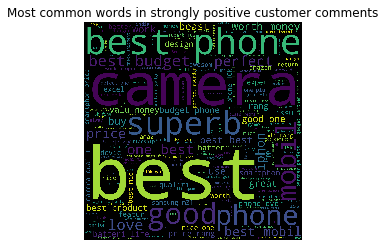

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='strongly positive','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in strongly positive customer comments")
plt.axis('off')
plt.show()

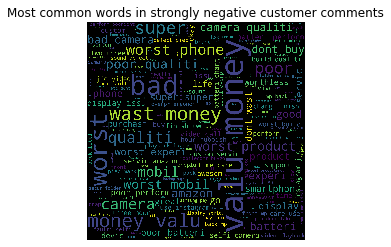

In [34]:
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='strongly negative','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in strongly negative customer comments")
plt.axis('off')
plt.show()

In [35]:
products_strongly_positive = df.loc[df['review_category']=='strongly positive','product_name'].tolist()

In [36]:
plot_list_positive = products_strongly_positive[0:25]

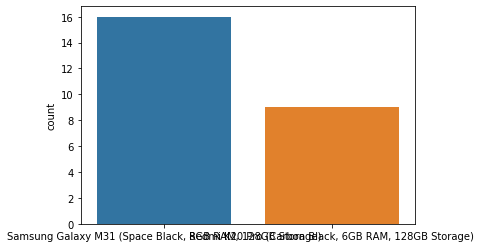

In [37]:
sns.countplot(plot_list_positive)

#these are the mobiles with strongly positive count

In [38]:
products_strongly_negative = df.loc[df['review_category']=='strongly negative','product_name'].tolist()

In [39]:
plot_list_negative = products_strongly_negative[300:325]

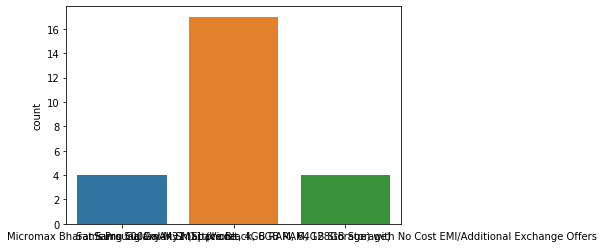

In [40]:
sns.countplot(plot_list_negative)

#mobiles with strongly negative reviews